# Logistic Regression -Breast Cancer dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Response is in target and target_names<br>
Predictors are in data and feature_names

In [3]:
y = cancer.target
X = cancer.data

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# Create DataFrame with the 30 predictors

In [6]:
list1 = list(cancer.feature_names)
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# describe the scaling per feature

In [8]:
df0.describe().iloc[3:,:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.00000,0.00000,0.1060,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0000,0.00000,0.1565,0.05504
25%,11.700,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.05770,...,13.01,21.08,84.11,515.3,0.11660,0.14720,0.1145,0.06493,0.2504,0.07146
50%,13.370,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,0.1792,0.06154,...,14.97,25.41,97.66,686.5,0.13130,0.21190,0.2267,0.09993,0.2822,0.08004
75%,15.780,21.80,104.10,782.7,0.10530,0.13040,0.13070,0.07400,0.1957,0.06612,...,18.79,29.72,125.40,1084.0,0.14600,0.33910,0.3829,0.16140,0.3179,0.09208
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.42680,0.20120,0.3040,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.2520,0.29100,0.6638,0.20750


In [9]:
df0.shape

(569, 30)

## Logistic Regression

In [10]:
y = cancer.target
X = cancer.data

In [11]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X,y);

/Users/cam/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# lbfgs failed to converge. Must increase max iterations

In [13]:
model = LogisticRegression(solver = 'lbfgs',max_iter = 10000)
model.fit(X,y);

In [14]:
# logistic regression coefficients
model.coef_

array([[ 0.98114302,  0.18221066, -0.27795638,  0.02313078, -0.18050582,
        -0.21318221, -0.53131622, -0.29736294, -0.26732957, -0.0293317 ,
        -0.07664873,  1.28989857,  0.10015952, -0.10819559, -0.02570095,
         0.07412436, -0.02991545, -0.03817636, -0.03429901,  0.01522229,
         0.13598589, -0.43986118, -0.10364861, -0.01372572, -0.36228562,
        -0.67214994, -1.42116692, -0.60887842, -0.72730758, -0.09285451]])

In [15]:
model.intercept_

array([28.37347082])

## Scaling

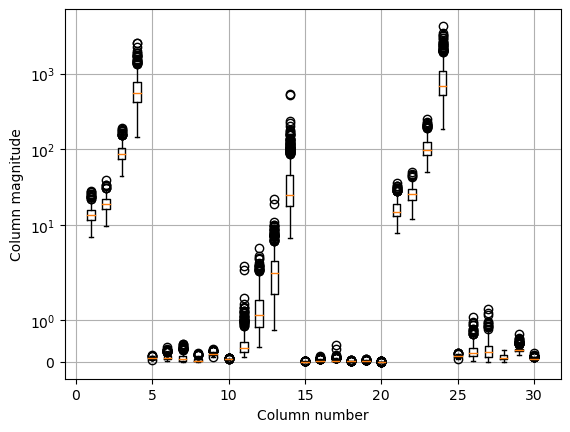

In [16]:
# range of predictors (not scaled)
plt.boxplot(cancer.data, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Column number")
plt.ylabel("Column magnitude")
plt.grid();

### Holdout Cross Validation

In [17]:
y = cancer.target
X = cancer.data

print(X.shape,y.shape)

(569, 30) (569,)


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=66)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# Find min/max of each feature in Train set

In [22]:
scaler.fit(X_train);

In [23]:
# Now transform data into (0,1) 
# substracting the train set Min, 
# dividing by the train set range

In [24]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Boxplots of scaled Train and Test sets

/var/folders/d7/8d55xd4s09x_gjbk8q8dlhvr0000gn/T/ipykernel_19099/1581143938.py:4: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  plt.ylim(-1,11)


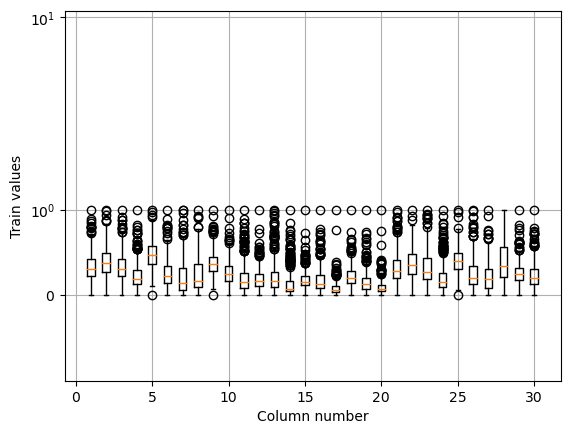

In [26]:
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Column number")
plt.ylim(-1,11)
plt.ylabel("Train values")
plt.grid();

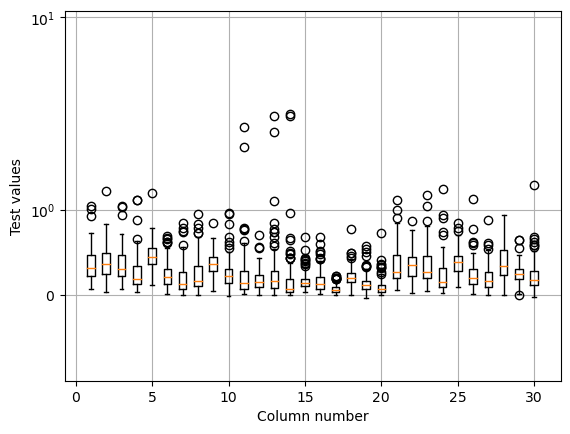

In [27]:
plt.boxplot(X_test_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Column number")
plt.ylim(-1,11)
plt.ylabel("Test values")
plt.grid();

In [28]:
# Compare test accuracy rate without and with scaling

In [29]:
model = LogisticRegression(solver = 'lbfgs',max_iter=10000)
model.fit(X_train,y_train)
yhat = model.predict(X_test)
model.score(X_test,y_test)

0.9440559440559441

In [30]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train_scaled,y_train)
yhat = model.predict(X_test_scaled)
model.score(X_test_scaled,y_test)

0.972027972027972

### Stratified K-fold Cross Validation

In [31]:
# Not Scaling each fold

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [33]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)

In [34]:
model1 = LogisticRegression(solver = 'lbfgs',max_iter = 10000)
scores = cross_val_score(model1,X,y,cv=kfold)
scores

array([0.94736842, 0.94736842, 0.93859649, 0.95614035, 0.96460177])

In [35]:
scores.mean()

0.9508150908244062

In [36]:
# Scaling each fold

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [38]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)

In [39]:
scaler = MinMaxScaler()
model1 = LogisticRegression(solver = 'lbfgs')
pipe1 = Pipeline([('transformer1', scaler), ('estimator1', model1)])
scores = cross_val_score(pipe1,X,y,cv=kfold)
scores

array([0.94736842, 0.98245614, 0.96491228, 0.96491228, 0.95575221])

In [40]:
scores.mean()

0.9630802670392795